In [4]:
from tools.game_tools import *

Inside the `game_tools.py` file, you can find the `Board()` class: one of its outputs is the game grid, created for the purpose of being able to play a game or observe its simulation. It also contains a bunch of vectors that are used to store all the useful information about the *board state*, such as the number of possible moves left, the number of valid moves and so on.\
All this information will later be used by the `Player()`'s children classes to make the decision about the next move.

The `Game()` object instantiates the game itself: the most important argument is the `game_type` argument, which selects the two participants in the game, whether human or algorithmic.

In [5]:
user_game_try = Game(game_type='user-user', verbose=True, player1='John', player2='Anna')

Game Type: user-user
Player #1: Anna, Human
Player #2: John, Human


In the cell below, you can challenge a friend in a classic game of *Connect4*.

In [6]:
user_game_try.play_game()

The WINNER is Anna, Human!!!
+----------------------------------------------------------------+
0  |     |     |     |     |     |     |     |
   +-----+-----+-----+-----+-----+-----+-----+
1  |     |     |     |     |     |     |     |
   +-----+-----+-----+-----+-----+-----+-----+
2  |     |     |  O  |     |     |     |     |
   +-----+-----+-----+-----+-----+-----+-----+
3  |     |     |  X  |  O  |     |     |     |
   +-----+-----+-----+-----+-----+-----+-----+
4  |     |  X  |  O  |  X  |  O  |     |     |
   +-----+-----+-----+-----+-----+-----+-----+
5  |  X  |  O  |  O  |  X  |  X  |  O  |     |
   +-----+-----+-----+-----+-----+-----+-----+
      0     1     2     3     4     5     6     


By using the `save_game()` method, the whole game (sequence of the board states) is stored inside a Pandas Dataframe. As you can see, it is composed of 9 columns plus the index column, which just represents the turn number.\
\
Note that the *choice* column contains the player's choice on the board state represented along the same row, meaning that its effect on the board can be seen only in the following row.\
I decided to use this structure with the training of future ML models in mind: since the goal is for the model to produce a choice, we must imagine that it can only have data from the past to do so.\
Using as a feature a board state that has already been affected by a choice not yet made would be like looking into the future.

In [7]:
df = user_game_try.save_game()
df.head()

,player,choice,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,Anna,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,John,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, -1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,Anna,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, -1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,John,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, -1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, -1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,Anna,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, -1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, -1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


The `simulation()` function repeats the same process $n$ times. The goal is to simulate $n$ games played by autonomous systems.\
It also rearranges the indexing, so that each game has a unique index and the turn number as before, ending with 10 total columns.\
Note that the function avoids those games that end in a draw, since we are going to use only winning moves to train the algorithm.

In [8]:
dataset = simulation(n=100, game_type='random-random')

Simulating:   0%|               | 0/100 [00:00<?, ?it/s]

Simulating: 100%|███████████████| 100/100 [00:00<00:00, 130.57it/s]

Saving: ...


In [19]:
dataset.head()

,player,choice,col_0,col_1,col_2,col_3,col_4,col_5,col_6,move
0,Player 1,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0
0,Player 2,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1
0,Player 1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, -1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2
0,Player 2,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, -1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",3
0,Player 1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, -1.0, -1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",4


Now let's explore the dataset a bit.\
For example, let's start with plotting the distribution of the moves number.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# getting a bigger pre-saved dataset
if len(dataset.index.unique()) < 10_000:
    dataset = pd.read_csv('simulations/simulation_random-random_10000.csv', index_col=0)

In [ ]:
# exactly n simulations, none of them ending in a draw
len(dataset.index.unique())

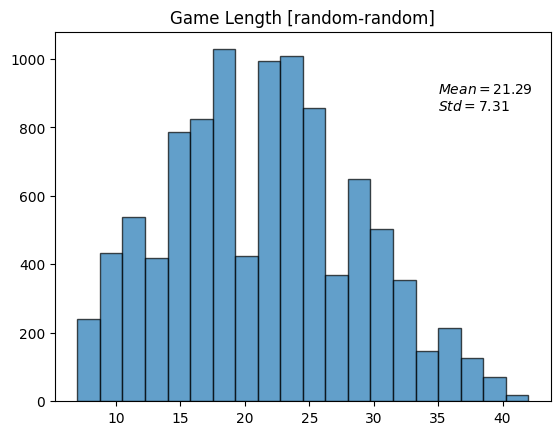

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42], dtype=int64)

In [14]:
row_count = dataset.groupby(level=0).size()

plt.hist(row_count, bins=20, alpha=0.7, edgecolor='black', linewidth=1)
plt.title('Game Length [random-random]')
plt.text(35, 900, f'$Mean = {row_count.mean().round(2)}$')
plt.text(35, 850, f'$Std = {row_count.std().round(2)}$')
plt.show()

np.sort(row_count.unique())

As expected, the absolute frequency follows a Gaussian distribution, with the minimum value being 7.\
\
We now check whether one player won more times than the other, and also whether being the initial player may have provided an advantage on the final outcome of the match.

In [15]:
first_move = dataset.groupby(dataset.index).first() # first row of each sequence (game)
last_move = dataset.groupby(dataset.index).last()   # last row of each sequence (game)
player_list = first_move['player'].unique()         # players' names

In [16]:
for player in player_list:
    print(f'{player} winrate = ', len(last_move[last_move['player'] == player]) / len(last_move))
print(f'Starter winrate  = ', len(first_move[first_move['player'] == last_move['player']]) / len(last_move))

Player 1 winrate =  0.5041
Player 2 winrate =  0.4959
Starter winrate  =  0.5615


The random players' winrates are basically identical, while it seems that starting the game first can give a certain advantage.\
\
Now you can try to play a game against this random-playing opponent, called *Randy*. The goal is to train a neural network that ultimately provides a much more stimulating level of challenge than *Randy*.\
\
*__Note__: when playing against any autonomous player, remember to set the argument `verbose=True`, otherwise the opponent's choice won't be displayed. Just press any key to display its choice during the game.*

In [17]:
play_game = Game(game_type='user-random', verbose=True, pause=True, player1='John', player2='Randy')

Game Type: user-random
Player #1: Randy, RandomAI
Player #2: John, Human


In [20]:
play_game.play_game()

The WINNER is Randy, RandomAI!!!
+----------------------------------------------------------------+
0  |     |     |     |     |     |     |     |
   +-----+-----+-----+-----+-----+-----+-----+
1  |     |     |     |     |     |     |     |
   +-----+-----+-----+-----+-----+-----+-----+
2  |     |     |  O  |     |  O  |     |     |
   +-----+-----+-----+-----+-----+-----+-----+
3  |     |     |  X  |  O  |  X  |     |     |
   +-----+-----+-----+-----+-----+-----+-----+
4  |     |  X  |  O  |  X  |  X  |  O  |     |
   +-----+-----+-----+-----+-----+-----+-----+
5  |  O  |  O  |  X  |  O  |  O  |  X  |     |
   +-----+-----+-----+-----+-----+-----+-----+
      0     1     2     3     4     5     6     
